In [1]:
import requests
import pandas as pd
import json
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
API_KEY='0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

#Fetches cryptocurrency data from the CoinMarketCap
def fetch_crypto_data(start=1, limit=15):
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': API_KEY,
    }
    params = {
        'start': str(start),
        'limit': str(limit),
        'convert': 'USD'
    }
    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        return response.json()['data']
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

In [3]:
#Converts the raw data fetched from the API into a structured DataFrame format and adds a timestamp.
def normalize_data(data):
    if data:
        df = pd.json_normalize(data)
        df['timestamp'] = pd.to_datetime('now')
        return df
    return pd.DataFrame()


In [4]:
def append_data(df, new_data):
    return pd.concat([df, new_data], ignore_index=True)

In [5]:
def run_api_loop(interval=60, runs=333):
    df = pd.DataFrame()
    for _ in range(runs):
        new_data = normalize_data(fetch_crypto_data())
        df = append_data(df, new_data)
        print('API Call Completed.')
        sleep(interval)
    return df

In [ ]:
def save_to_csv(df, filename='crypto_data.csv'):
    df.to_csv(filename, index=False)

In [ ]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [ ]:
def analyze_trends(df):
    grouped = df.groupby('name', sort=False)[[
        'quote.USD.percent_change_1h',
        'quote.USD.percent_change_24h',
        'quote.USD.percent_change_7d'
    ]].mean().reset_index()

    return grouped.melt(id_vars='name',
                        var_name='time_period',
                        value_name='percent_change')

In [ ]:
def plot_trends(df):
    sns.catplot(x='time_period', y='percent_change', hue='name', data=df, kind='point')
    plt.xticks(rotation=45)
    plt.title("Crypto Price Changes Over Time")
    plt.show()

API Call Completed.
API Call Completed.
API Call Completed.
API Call Completed.
API Call Completed.
API Call Completed.
API Call Completed.
API Call Completed.
API Call Completed.
API Call Completed.


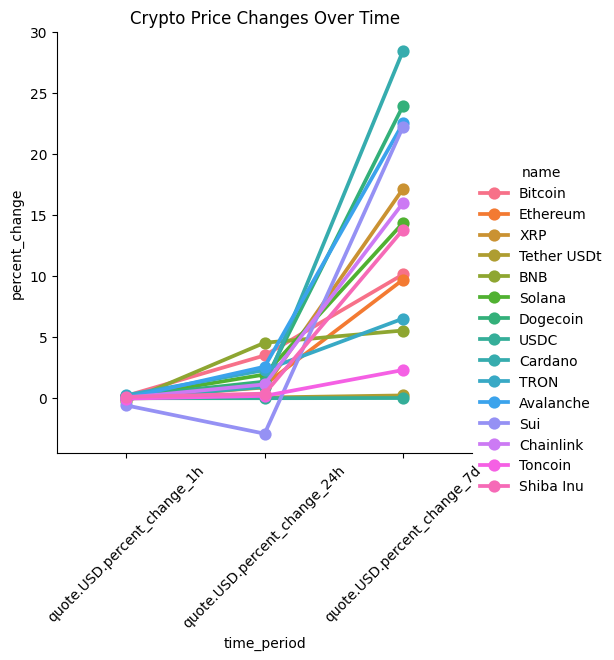

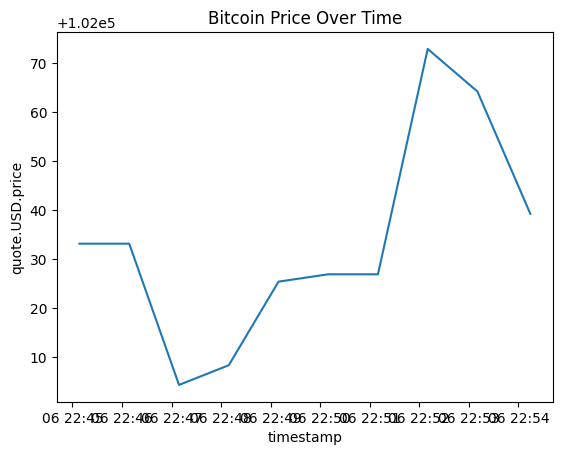

In [ ]:
def plot_price_over_time(df, coin_name='Bitcoin'):
    filtered = df[df['name'] == coin_name]
    sns.lineplot(x='timestamp', y='quote.USD.price', data=filtered)
    plt.title(f"{coin_name} Price Over Time")
    plt.show()

if __name__ == "__main__":
    df = run_api_loop(runs=10)  # Example: Run 10 times
    plot_trends(analyze_trends(df))
    plot_price_over_time(df)